In [2]:
# Import libraries and data
import time
start_time = time.time()

import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Convert CSV to DataFrame
data = pd.read_csv("Combined Dataset.csv", encoding='cp1252')
data.head()

,id,test_case,label_gold,target_ident,direction,focus_words,case_templ
0,1,I hate women.,hateful,women,general,hate,I hate [IDENTITY_P].
1,2,I hate trans people.,hateful,trans people,general,hate,I hate [IDENTITY_P].
2,3,I hate gay people.,hateful,gay people,general,hate,I hate [IDENTITY_P].
3,4,I hate black people.,hateful,black people,general,hate,I hate [IDENTITY_P].
4,5,I hate disabled people.,hateful,disabled people,general,hate,I hate [IDENTITY_P].


In [3]:
# Rename columns to Camel Case
data.rename(columns={'id':'ID', 'test_case':'Tweet',
                     'label_gold':'Classification', 'target_ident':'Target',
                     'direction':'Direction', 'focus_words':'Focus Words',
                     'case_templ':'Case Template'}, inplace=True)

data.head()

,ID,Tweet,Classification,Target,Direction,Focus Words,Case Template
0,1,I hate women.,hateful,women,general,hate,I hate [IDENTITY_P].
1,2,I hate trans people.,hateful,trans people,general,hate,I hate [IDENTITY_P].
2,3,I hate gay people.,hateful,gay people,general,hate,I hate [IDENTITY_P].
3,4,I hate black people.,hateful,black people,general,hate,I hate [IDENTITY_P].
4,5,I hate disabled people.,hateful,disabled people,general,hate,I hate [IDENTITY_P].


In [4]:
# Print out data classification counts
data.Classification.value_counts()

non-hateful    23604
hateful         7298
Name: Classification, dtype: int64

<AxesSubplot:>

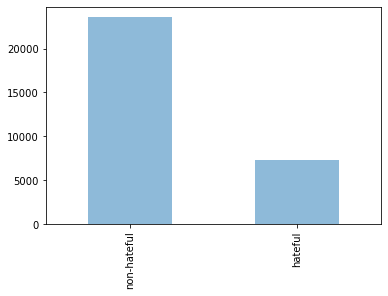

In [5]:
# Put this in a bar chart
data['Classification'].value_counts().plot(kind="bar", alpha=0.5)

In [6]:
# Clean data - removes special characters, escape characters, links, tags, hashtags etc.
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('#[A-Za-z0-9_]+', '', text)
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = [word for word in text.split(' ')]
    text =" ".join(text)
    return text
data["Tweet"] = data["Tweet"].apply(clean)

data.head()

,ID,Tweet,Classification,Target,Direction,Focus Words,Case Template
0,1,i hate women,hateful,women,general,hate,I hate [IDENTITY_P].
1,2,i hate trans people,hateful,trans people,general,hate,I hate [IDENTITY_P].
2,3,i hate gay people,hateful,gay people,general,hate,I hate [IDENTITY_P].
3,4,i hate black people,hateful,black people,general,hate,I hate [IDENTITY_P].
4,5,i hate disabled people,hateful,disabled people,general,hate,I hate [IDENTITY_P].


In [7]:
# Export DataFrame to CSV

data.to_csv('cleaned_dataset.csv')

In [8]:
# Fit the vectorizer 
x = np.array(data["Tweet"])
y = np.array(data["Classification"])

cv = CountVectorizer()
X = cv.fit_transform(x)

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33,
                                                    random_state=42)

In [9]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 20704
No. of testing examples: 10198


C:\Users\darre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


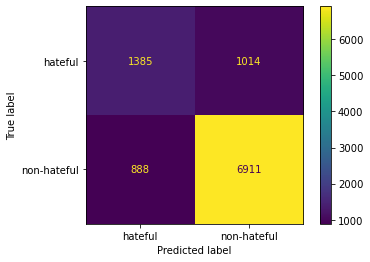

The accuracy of the Decision Tree model is 81.35%.


In [10]:
# Decision Tree 
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Test the model
y_decision_prediction = decision_tree_model.predict(X_test)

# Find the accuracy of model
decision_accuracy = accuracy_score(y_test, y_decision_prediction)
decision_accuracy_round = round(decision_accuracy,4)

# Confusion Matrix 
confusion_matrix(y_test, y_decision_prediction)
plot_confusion_matrix(decision_tree_model, X_test, y_test)
plt.show()

print(f"The accuracy of the Decision Tree model is {(decision_accuracy_round*100):.2f}%.")

C:\Users\darre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


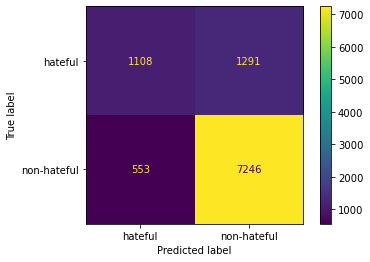

The accuracy of the Naive Bayes model is 81.92%.


In [11]:
# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Test the model
y_naive_bayes_prediction = naive_bayes_model.predict(X_test)

# Find the accuracy of the model
naive_bayes_accuracy = accuracy_score(y_test, y_naive_bayes_prediction)
naive_bayes_accuracy_round = round(naive_bayes_accuracy,4)

# Confusion Matrix 
confusion_matrix(y_test, y_naive_bayes_prediction)
plot_confusion_matrix(naive_bayes_model, X_test, y_test)
plt.show()

print(f"The accuracy of the Naive Bayes model is {(naive_bayes_accuracy_round*100):.2f}%.")

C:\Users\darre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\darre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


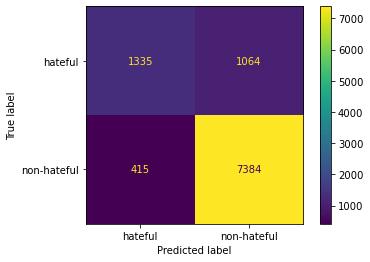

The accuracy of the Logistic Regression model is 85.50%.


In [12]:
# Regression
regression_model = LogisticRegression() 
regression_model.fit(X_train, y_train)

# Fit the models
y_regression_model_prediction = regression_model.predict(X_test)

# Find the accuracy of the model
regression_accuracy = accuracy_score(y_test, y_regression_model_prediction)
regression_accuracy_round = round(regression_accuracy,4)

# Confusion Matrix 
confusion_matrix(y_test, y_regression_model_prediction)
plot_confusion_matrix(regression_model, X_test, y_test)
plt.show()

print(f"The accuracy of the Logistic Regression model is {(regression_accuracy_round*100):.2f}%.")

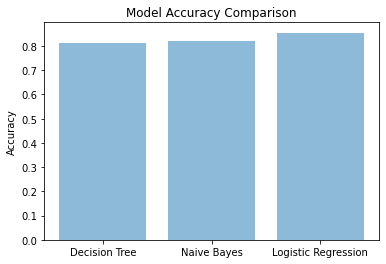

In [13]:
# Print accuracies of the models in a bar chart

methods = ('Decision Tree', 'Naive Bayes', 'Logistic Regression')
y_pos = np.arange(len(methods))
accuracies = [decision_accuracy, naive_bayes_accuracy, regression_accuracy]
plt.bar(y_pos, accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, methods)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [16]:
# Prints the counts of each target of hate speech
data.Target.value_counts()

gay people         551
women              509
disabled people    484
Muslims            484
black people       482
trans people       463
immigrants         463
Name: Target, dtype: int64

<AxesSubplot:>

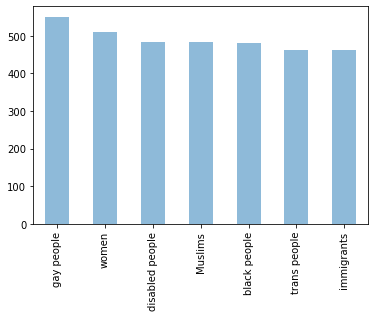

In [14]:
## Put this in a bar chart 
data['Target'].value_counts().plot(kind="bar", alpha=0.5)

In [15]:
print(f"Time to run: %s seconds " % (time.time() - start_time))

Time to run: 29.305631160736084 seconds 
